In [134]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

In [143]:
# horizntal cell in this matrix... first 2 columns are position. 0,0; 0,1 etc. 
# third position is wheter blocked (0) or open (1).
# fourth position is index of whether / when visited. 0 means not visited yet. a number would indicate nth step.
# total N * M tiles. blocked n * m. N,n - vertical. M,m - horizontal 
# N(i) -> x.   M(j) -> y 
N = 6
M = 5
n = 2
m = 2

arr = np.empty((N,M,4)).astype(np.int32)

for i in range(N):
    for j in range(M):
        arr[i,j] = [i,j,1,0]

arr[0:n,0:m,2] = 0
arr[N-n:N,M-m:M,2] = 0
arr[0:n,M-m:M,2] = 0
arr[N-n:N,0:m,2] = 0

In [144]:
step = 1
total_steps = 0
for i in range(N):
    for j in range(M):
        if (total_steps == 0):
            if (arr[i,j,2] == 1) & (arr[i,j,3] == 0):
                arr[i,j,3] = step
                x = i
                y = j
                current_process = 'x+1'
        if (arr[i,j,2] == 1):
            total_steps = total_steps + 1


In [145]:
for step in range(2, total_steps+1):
    if (x == N-1) & (y+1 < M):
        if (y+1 < M) & (arr[x,y+1,2] == 1) & (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
        elif (x-1 >= 0) & (arr[x-1,y,2] == 1) & (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'

    elif (y == M-1):
        if (x-1 >= 0) & (arr[x-1,y,2] == 1) & (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
        elif (y-1 >= 0) & (arr[x,y-1,2] == 1) & (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
                
    elif (x == 0):
        if (y-1 >= 0) & (arr[x,y-1,2] == 1) & (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
        elif (x+1 < N) & (arr[x+1,y,2] == 1) & (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
                
    elif (y == 0):
        if (x+1 < N) & (arr[x+1,y,2] == 1) & (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
        elif (y+1 < M) & (arr[x,y+1,2] == 1) & (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'        
             
    elif current_process == 'x+1':
        if (y-1 >= 0) & (arr[x,y-1,2] == 1) & (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
        elif (x+1 < N) & (arr[x+1,y,2] == 1) & (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
        elif (y+1 < M) & (arr[x,y+1,2] == 1) & (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
    elif current_process == 'y+1':
        if (x+1 < N) & (arr[x+1,y,2] == 1) & (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
        elif (y+1 < M) & (arr[x,y+1,2] == 1) & (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
        elif (x-1 >= 0) & (arr[x-1,y,2] == 1) & (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
    elif current_process == 'x-1':
        if (y+1 < M) & (arr[x,y+1,2] == 1) & (arr[x,y+1,3] == 0):
                arr[x,y+1,3] = step
                y = y+1
                current_process = 'y+1'
        elif (x-1 >= 0) & (arr[x-1,y,2] == 1) & (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
        elif (y-1 >= 0) & (arr[x,y-1,2] == 1) & (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
    elif current_process == 'y-1':
        if (x-1 >= 0) & (arr[x-1,y,2] == 1) & (arr[x-1,y,3] == 0):
                arr[x-1,y,3] = step
                x = x-1
                current_process = 'x-1'
        elif (y-1 >= 0) & (arr[x,y-1,2] == 1) & (arr[x,y-1,3] == 0):
                arr[x,y-1,3] = step
                y = y-1
                current_process = 'y-1'
        elif (x+1 < N) & (arr[x+1,y,2] == 1) & (arr[x+1,y,3] == 0):
                arr[x+1,y,3] = step
                x = x+1
                current_process = 'x+1'
            


In [146]:
arr

array([[[ 0,  0,  0,  0],
        [ 0,  1,  0,  0],
        [ 0,  2,  1,  1],
        [ 0,  3,  0,  0],
        [ 0,  4,  0,  0]],

       [[ 1,  0,  0,  0],
        [ 1,  1,  0,  0],
        [ 1,  2,  1,  2],
        [ 1,  3,  0,  0],
        [ 1,  4,  0,  0]],

       [[ 2,  0,  1,  5],
        [ 2,  1,  1,  4],
        [ 2,  2,  1,  3],
        [ 2,  3,  1,  0],
        [ 2,  4,  1,  0]],

       [[ 3,  0,  1,  6],
        [ 3,  1,  1,  7],
        [ 3,  2,  1,  8],
        [ 3,  3,  1,  0],
        [ 3,  4,  1,  0]],

       [[ 4,  0,  0,  0],
        [ 4,  1,  0,  0],
        [ 4,  2,  1,  9],
        [ 4,  3,  0,  0],
        [ 4,  4,  0,  0]],

       [[ 5,  0,  0,  0],
        [ 5,  1,  0,  0],
        [ 5,  2,  1, 10],
        [ 5,  3,  0,  0],
        [ 5,  4,  0,  0]]])

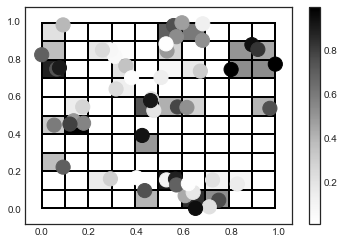

In [133]:
import numpy as np
import matplotlib.pyplot as plt

x, y, z = np.random.random((3, 50))

zi, yi, xi = np.histogram2d(y, x, bins=(10,10), weights=z, normed=False)
zi = np.ma.masked_equal(zi, 0)

fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, zi, edgecolors='black')
scat = ax.scatter(x, y, c=z, s=200)
fig.colorbar(scat)
ax.margins(0.05)

plt.show()

In [18]:
arr

array([[[ 0,  0,  0,  0],
        [ 0,  1,  0,  0],
        [ 0,  2,  1,  1],
        [ 0,  3,  1, 32],
        [ 0,  4,  1, 31],
        [ 0,  5,  1, 30],
        [ 0,  6,  0,  0],
        [ 0,  7,  0,  0]],

       [[ 1,  0,  0,  0],
        [ 1,  1,  0,  0],
        [ 1,  2,  1,  2],
        [ 1,  3,  1, 33],
        [ 1,  4,  1, 56],
        [ 1,  5,  1, 29],
        [ 1,  6,  0,  0],
        [ 1,  7,  0,  0]],

       [[ 2,  0,  0,  0],
        [ 2,  1,  0,  0],
        [ 2,  2,  1,  3],
        [ 2,  3,  1, 34],
        [ 2,  4,  1, 55],
        [ 2,  5,  1, 28],
        [ 2,  6,  0,  0],
        [ 2,  7,  0,  0]],

       [[ 3,  0,  1,  6],
        [ 3,  1,  1,  5],
        [ 3,  2,  1,  4],
        [ 3,  3,  1, 35],
        [ 3,  4,  1, 54],
        [ 3,  5,  1, 27],
        [ 3,  6,  1, 26],
        [ 3,  7,  1, 25]],

       [[ 4,  0,  1,  7],
        [ 4,  1,  1, 38],
        [ 4,  2,  1, 37],
        [ 4,  3,  1, 36],
        [ 4,  4,  1, 53],
        [ 4,  5,  1, 52],
    

In [12]:
for i in range(N):
    for j in range(M):
        if (arr[i,j,2] == 1):
            if (arr[i,j,3] != 0):
                print (arr[i,j], 'was open -- now USED --')
            else:
                print (arr[i,j], 'open')
        else:
            print (arr[i,j], 'blocked')


[0 0 0 0] blocked
[0 1 0 0] blocked
[0 2 1 1] was open -- now USED --
[ 0  3  1 32] was open -- now USED --
[ 0  4  1 31] was open -- now USED --
[ 0  5  1 30] was open -- now USED --
[0 6 0 0] blocked
[0 7 0 0] blocked
[1 0 0 0] blocked
[1 1 0 0] blocked
[1 2 1 2] was open -- now USED --
[ 1  3  1 33] was open -- now USED --
[ 1  4  1 56] was open -- now USED --
[ 1  5  1 29] was open -- now USED --
[1 6 0 0] blocked
[1 7 0 0] blocked
[2 0 0 0] blocked
[2 1 0 0] blocked
[2 2 1 3] was open -- now USED --
[ 2  3  1 34] was open -- now USED --
[ 2  4  1 55] was open -- now USED --
[ 2  5  1 28] was open -- now USED --
[2 6 0 0] blocked
[2 7 0 0] blocked
[3 0 1 6] was open -- now USED --
[3 1 1 5] was open -- now USED --
[3 2 1 4] was open -- now USED --
[ 3  3  1 35] was open -- now USED --
[ 3  4  1 54] was open -- now USED --
[ 3  5  1 27] was open -- now USED --
[ 3  6  1 26] was open -- now USED --
[ 3  7  1 25] was open -- now USED --
[4 0 1 7] was open -- now USED --
[ 4  1  1 38] 